# COVID BEDS

In [76]:
# Importing the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [77]:
# Loading data
data = pd.read_csv('Hospitalization_all_locs.csv')

# Printing first five rows and data type of each column
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

   V1 location_name        date  allbed_mean  allbed_lower  allbed_upper  \
0   1       Abruzzo  2020-01-03          0.0           0.0           0.0   
1   2       Abruzzo  2020-01-04          0.0           0.0           0.0   
2   3       Abruzzo  2020-01-05          0.0           0.0           0.0   
3   4       Abruzzo  2020-01-06          0.0           0.0           0.0   
4   5       Abruzzo  2020-01-07          0.0           0.0           0.0   

   ICUbed_mean  ICUbed_lower  ICUbed_upper  InvVen_mean  ...  newICU_upper  \
0          0.0           0.0           0.0          0.0  ...           0.0   
1          0.0           0.0           0.0          0.0  ...           0.0   
2          0.0           0.0           0.0          0.0  ...           0.0   
3          0.0           0.0           0.0          0.0  ...           0.0   
4          0.0           0.0           0.0          0.0  ...           0.0   

   totdea_mean  totdea_lower  totdea_upper  bedover_mean  bedover_lower  \

# Data Wrangling

* We're grouping by date and applying sum because we have data on states, and all the mean points corresponding to states add up to resemble those for countries. 
* We're also eliminating all rows that have zeroes in mean, lower bound, and upper bound columns

In [78]:
data = data[['date', 'allbed_mean','allbed_lower', 'allbed_upper']].groupby(['date']).sum().reset_index()
data = data[(data['allbed_mean']!=0) & (data['allbed_lower']!=0) & (data['allbed_upper']!=0)]

In [79]:
# Fetching only columns of interest
allBedData = data[['date', 'allbed_mean']]
allBedData.head()

,date,allbed_mean
47,2020-02-19,57.084621
48,2020-02-20,82.560621
49,2020-02-21,114.939195
50,2020-02-22,170.649595
51,2020-02-23,219.889829


### Datetime conversion

Since date column is having object data type, let's resolve that.

In [80]:
allBedData['date'] = pd.to_datetime(allBedData['date'])

Now, since there are multiple values corresponding to one date because we removed location column from this data, we need to group these dates and find out the final COVID Beds value corresponding to each date.

### Grouping the column by date

In [81]:
allBedData = allBedData.groupby(['date']).sum().reset_index()
allBedData.iloc[50:100]

,date,allbed_mean
50,2020-04-09,278047.094161
51,2020-04-10,283285.083066
52,2020-04-11,286242.998166
53,2020-04-12,287638.386094
54,2020-04-13,288537.403989
55,2020-04-14,293961.921727
56,2020-04-15,289404.989199
57,2020-04-16,283260.557846
58,2020-04-17,274905.182936
59,2020-04-18,266657.454055


In [82]:
#setting index to date
allBedData = allBedData.set_index('date')
allBedData.index

DatetimeIndex(['2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28',
               ...
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-11', '2020-07-12'],
              dtype='datetime64[ns]', name='date', length=145, freq=None)

In [83]:
# Keeping historical data till 25th April 2020
allBedData = allBedData[allBedData.index <= '2020-04-25']
allBedData.columns = ['value']
allBedData.tail()

,value
date,
2020-04-21,241787.631463
2020-04-22,233250.185832
2020-04-23,218926.040928
2020-04-24,204360.880449
2020-04-25,189741.033268


### Missing value analysis

We'll check if there's any missing value present in our data by applying isnull function on the dataset.

In [84]:
allBedData.isnull().any()

value    False
dtype: bool

Since we get 'False' as the result, we can say that there are no missing values in the dataset.

### Detecting outliers

First, let's follow graphical procedure to analyze if the data contains outliers or not. We'll use boxplot for this.

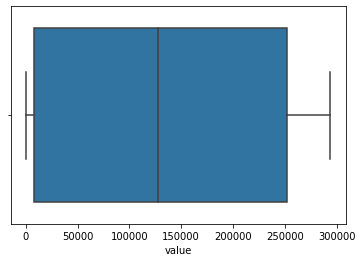

In [85]:
import seaborn as sns
sns.boxplot(x=allBedData['value'])

The boxplot shows that there are no outliers in the data, as there's no point which is lying outside of whiskers. Let's now see this via z-scores.

In [87]:
from scipy import stats
z = np.abs(stats.zscore(allBedData))
print(z)

[[1.157939  ]
 [1.15771702]
 [1.15743489]
 [1.15694947]
 [1.15652043]
 [1.15587875]
 [1.15524785]
 [1.15407469]
 [1.15204149]
 [1.14982989]
 [1.1466567 ]
 [1.14252451]
 [1.1404219 ]
 [1.13042417]
 [1.1231647 ]
 [1.11028206]
 [1.09677676]
 [1.08136358]
 [1.06320017]
 [1.04934059]
 [1.01795815]
 [0.98174566]
 [0.95382254]
 [0.91239578]
 [0.8668554 ]
 [0.79963837]
 [0.71539518]
 [0.64741585]
 [0.57574412]
 [0.46969296]
 [0.37096064]
 [0.27389128]
 [0.15496546]
 [0.04546864]
 [0.04848085]
 [0.15215852]
 [0.28263732]
 [0.41328612]
 [0.54839297]
 [0.6474119 ]
 [0.73549596]
 [0.80412358]
 [0.85937781]
 [0.97035899]
 [1.04937028]
 [1.11024012]
 [1.17263708]
 [1.23651378]
 [1.24831503]
 [1.24797622]
 [1.26427254]
 [1.30991273]
 [1.33568594]
 [1.34784438]
 [1.3556778 ]
 [1.40294327]
 [1.36323733]
 [1.30969903]
 [1.23689611]
 [1.16503114]
 [1.09450198]
 [1.0227937 ]
 [0.94833281]
 [0.87394345]
 [0.74913281]
 [0.62222214]
 [0.49483496]]


As can be seen from above array, every value has z-score less than +3 or greater than -3. Thus, no outliers are present in the data.